In [49]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


데이터 전처리

In [50]:
(X_train,y_train),(X_test,y_test)  =mnist.load_data()

In [51]:
print('학습셋 이미지 수 %d'%(X_train.shape[0]))
print('테스트셋 이미지 수 %d'%(X_test.shape[0]))

학습셋 이미지 수 60000
테스트셋 이미지 수 10000


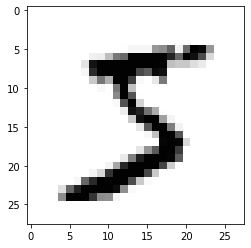

In [52]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [53]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s'%i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [54]:
X_train = X_train.reshape(X_train.shape[0],784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255

In [55]:
print('class %d'%y_train[0])

class 5


In [56]:
for x in range(28):
  for i in range(28):
    sys.stdout.write('%.2f '%X_train[0][28*x+i])
  sys.stdout.write('\n')

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.10 0.65 1.00 0.97 0.50 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.14 0.37 0.60 0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.00 0.00 0.00 0.00 
0.00 0.00 0.0

In [57]:
for x in range(28):
  for i in range(28):
    print('%.4s'%X_train[0][28*x+i],end='\t')
  sys.stdout.write('\n')

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.01	0.07	0.07	0.07	0.49	0.53	0.68	0.10	0.65	1.0	0.96	0.49	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.11	0.14	0.36	0.60	0.66	0.99	0.99	0.99	0.99	0.99	0.88	0.67	0.99	0.94	0.76	0.25	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.19	0.93	0.99	0.99	0.99	0.99	0.99	0.99	0.99	0.99	0.98	0.36	0.32	0.32	0.21	0.15	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.07	0.85	0.99	0.99	0.99	

In [58]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [59]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


딥러닝 기본 프레임

In [60]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [62]:
modelpath = 'MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [63]:
from gc import callbacks
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,
                    batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.18586, saving model to MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18586 to 0.13362, saving model to MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13362 to 0.11228, saving model to MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11228 to 0.10067, saving model to MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10067 to 0.09263, saving model to MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09263 to 0.08980, saving model to MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08980 to 0.08569, saving model to MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08569

Epoch 9: val_loss improved from 0.08569 to 0.08282, saving model to MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08282

Epoch 11: val_loss did not improve from 0.08282

Epoch 12: val_loss improved from 0.08282 to 0.08260, saving model to MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.08260

Epoch 14: val_loss improved from 0.08260 to 0.08193

In [64]:
print('\n Test acc %.4f'%(model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9827

 Test acc 0.9827


In [65]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

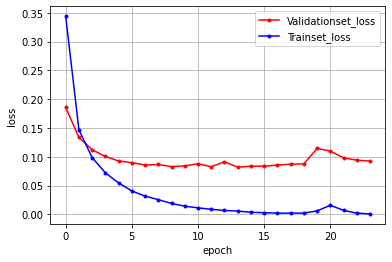

In [66]:
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Validationset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

CNN

In [67]:
from tensorflow.keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D


In [68]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float64')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [69]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])


In [70]:
modelpath = 'MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)


In [71]:
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,
                    verbose=0,callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.08696, saving model to MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08696 to 0.05965, saving model to MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05965 to 0.05045, saving model to MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05045 to 0.04655, saving model to MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04655

Epoch 6: val_loss did not improve from 0.04655

Epoch 7: val_loss improved from 0.04655 to 0.04344, saving model to MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04344 to 0.04132, saving model to MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04132

Epoch 10: val_loss did not improve from 0.04132

Epoch 11: val_loss did not improve from 0.04132

Epoch 12: val_loss did not improve from 0.04132

Epoch 13: val_loss did not improve from 0.04132

Epoch 14: val_loss did not improve from 0.04132

Epoch 15: val_loss did not improve from 0.04132

Epoch 16: val_loss did not improve from 0.04132

Epoch 17: va

In [72]:
print('\n Test accuracy %.4f'%(model.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9911

 Test accuracy 0.9911


In [73]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

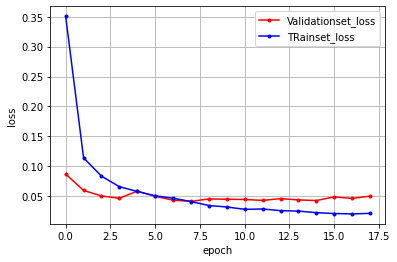

In [74]:
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Validationset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='TRainset_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()